#                                 Loan Application Status Prediction

#### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

    You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

##### Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

## Importing the required libraries and data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

### Lets upload the data set.

In [4]:
loan=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

### Checking the first five row of loan data set.

In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking the last five rows of loan data set.

In [6]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Checking the shape of loan data set.

In [7]:
loan.shape

(614, 13)

In [8]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Checking the info about the loan data set and memory.

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###### In our loan data set, we have 8 objects , 1 integers and 4 float columns data types.

In [10]:
loan.isnull().sum().sort_values(ascending=0)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

###### In 6 columns we have missing values.

### Checking unique value and counts in our loan data set.

In [11]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
loan['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [14]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
loan['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [19]:
loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
loan['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [21]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
loan['Credit_History'].nunique()

2

In [25]:
loan.nunique().sort_values(ascending=0)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

## Handling Missing Data

In [26]:
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(),inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mean(),inplace=True)

###### Lets check the data set after the missing imputation values.

In [27]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###### Great, Now no missing values in our data set.

## Lets check the null values through heatmap

<AxesSubplot:>

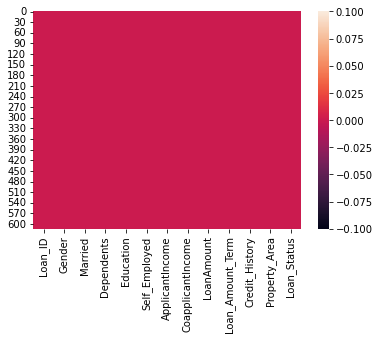

In [28]:
sns.heatmap(loan.isnull())

###### Now, Heatmap also reflecting no null value.

### Lets check the duplicate value in our loan data set.

In [29]:
loan.duplicated().sum()

0

###### Great, No duplicate value in our data set.

# Deleting Column

In [30]:
loan.drop(['Loan_ID'],axis=1,inplace=True)

###### As Loan_Id has no role in prediction, lets remove from our loan data set.

# Descriptive Statistics

In [31]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Visualization

In [32]:
Categorical_col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term']

In [33]:
Numerical_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

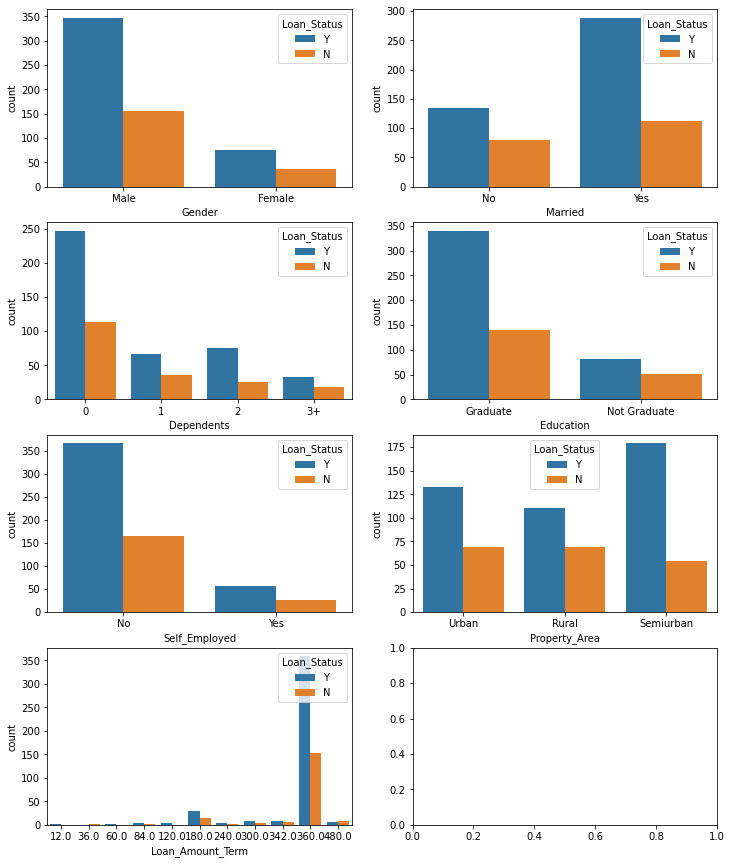

In [34]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(Categorical_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])


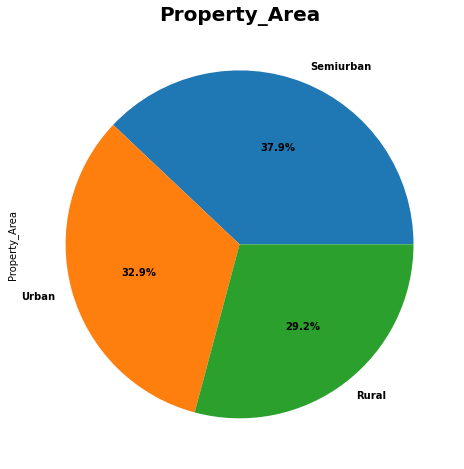

In [35]:
plt.subplots(figsize=(8,8))
loan['Property_Area'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Property_Area', fontsize=20,fontweight ='bold')
plt.show()

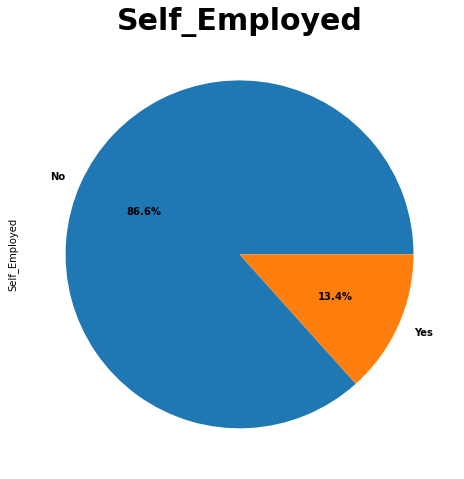

In [36]:
plt.subplots(figsize=(8,8))
loan['Self_Employed'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Self_Employed', fontsize=30,fontweight ='bold')
plt.show()

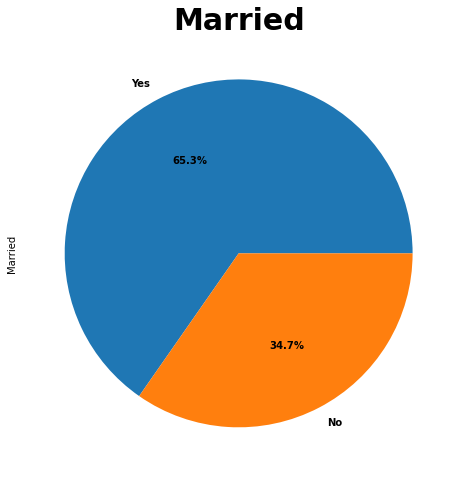

In [37]:
plt.subplots(figsize=(8,8))
loan['Married'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Married', fontsize=30,fontweight ='bold')
plt.show()

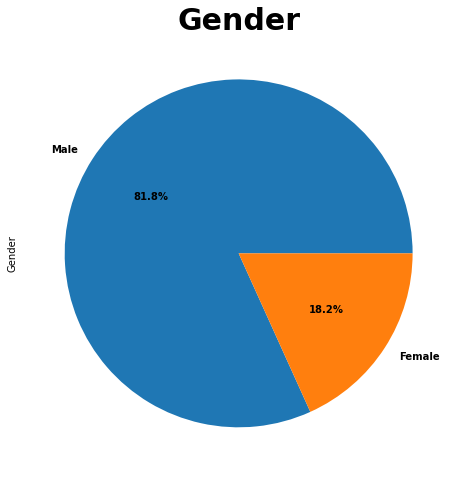

In [38]:
plt.subplots(figsize=(8,8))
loan['Gender'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Gender', fontsize=30,fontweight ='bold')
plt.show()

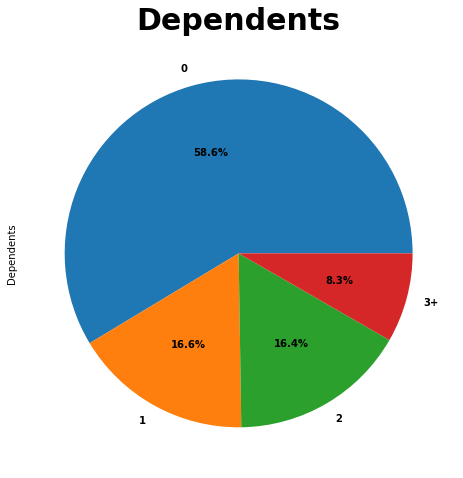

In [39]:
plt.subplots(figsize=(8,8))
loan['Dependents'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Dependents', fontsize=30,fontweight ='bold')
plt.show()

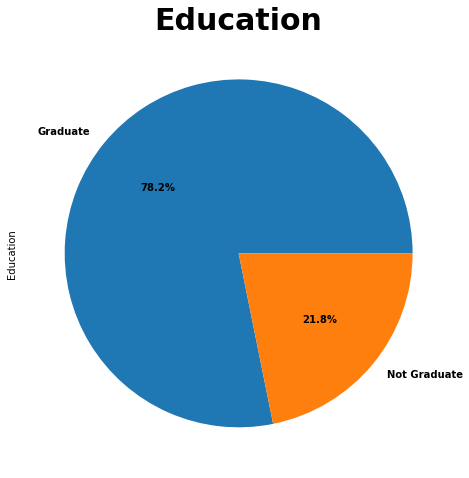

In [40]:
plt.subplots(figsize=(8,8))
loan['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Education', fontsize=30,fontweight ='bold')
plt.show()

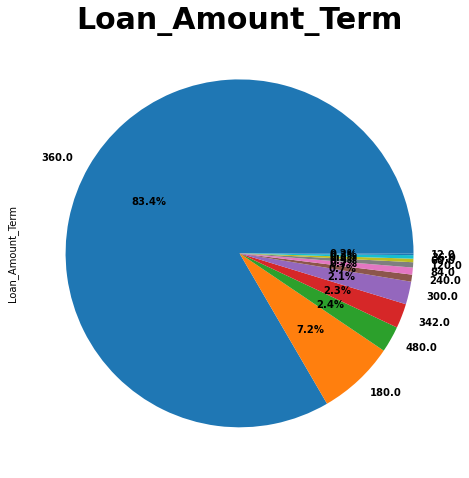

In [41]:
plt.subplots(figsize=(8,8))
loan['Loan_Amount_Term'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Loan_Amount_Term', fontsize=30,fontweight ='bold')
plt.show()

### Plotting distplot to check the distributions of each numerical category feature

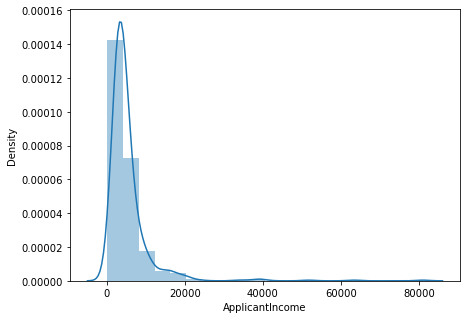

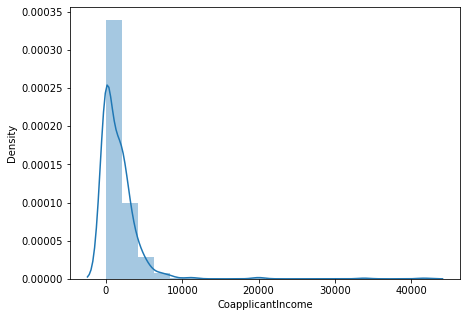

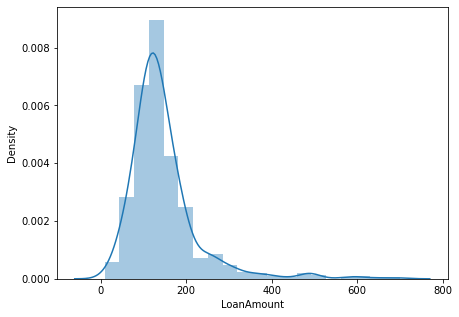

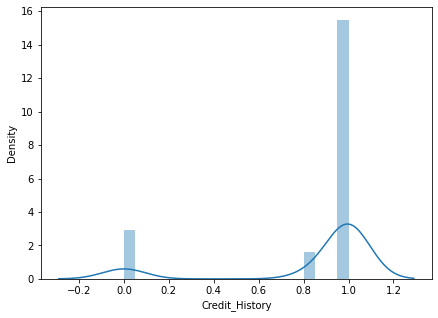

In [42]:
for i in Numerical_col:
    plt.figure(figsize=(7,5))
    sns.distplot(loan[i],hist=True,bins = 20,kde=True)
    plt.show()

# Label Encoding

In [43]:
encoder=LabelEncoder()

In [44]:
loan['Gender'] = encoder.fit_transform(loan['Gender'])
loan['Married'] = encoder.fit_transform(loan['Married'])
loan['Dependents'] = encoder.fit_transform(loan['Dependents'])
loan['Education'] = encoder.fit_transform(loan['Education'])
loan['Self_Employed'] = encoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = encoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = encoder.fit_transform(loan['Loan_Status'])

In [45]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Checking Correlation

In [46]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


### Lets check corelation in heat map

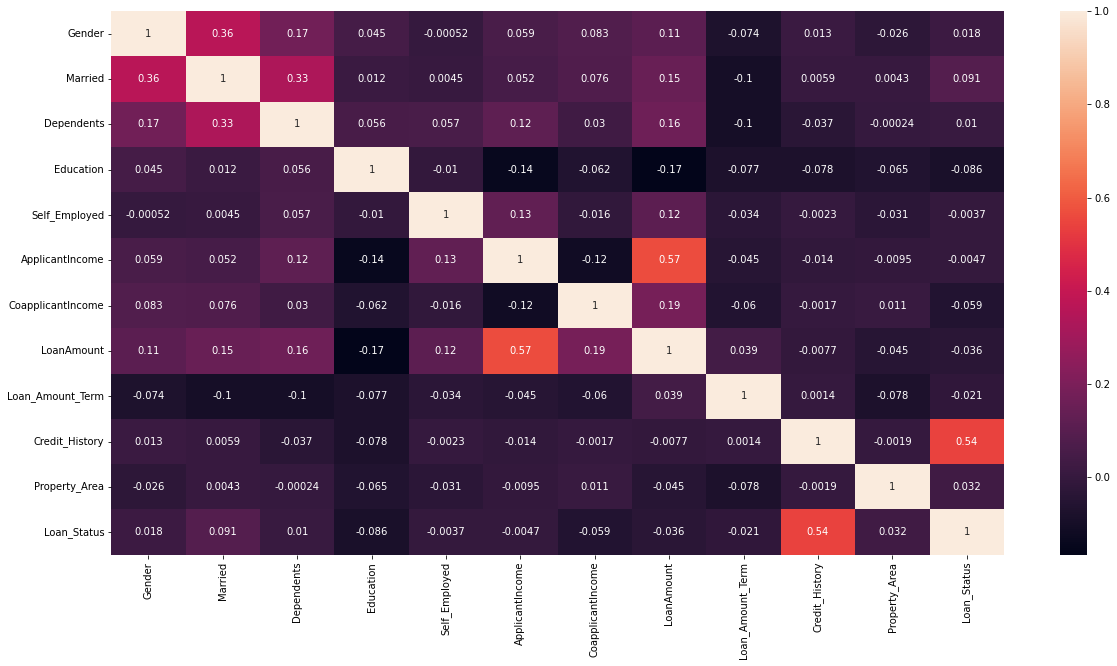

In [47]:
plt.figure(figsize= (20,10))
sns.heatmap(loan.corr(), annot=True)
plt.show()

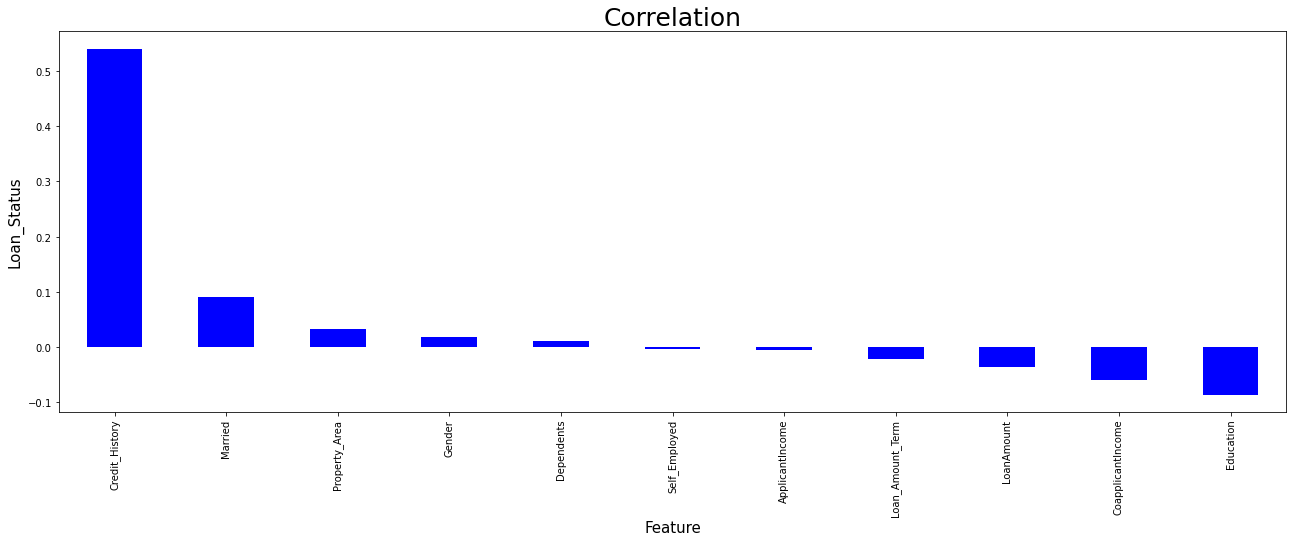

In [48]:
plt.figure(figsize=(22,7))
loan.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'b')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('Correlation', fontsize = 25)
plt.show()

###### None of the columns have very good correlation with our target column except Credit_History

# Checking Outliers

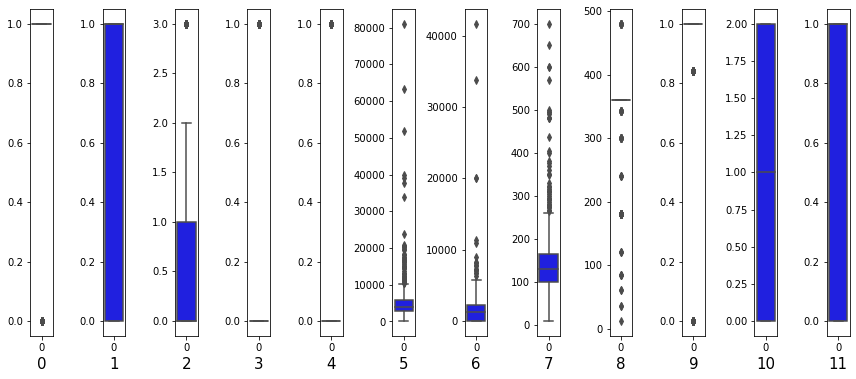

In [49]:
collist=loan.columns.values
ncol=12
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=loan[collist[column]],color='blue',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

Outliers are present in all the columns except Married, Property_Area and Loan_status

## Removing Outliers

## 1. Zscore method using Scipy

In [50]:
variables = loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

z=np.abs(zscore(variables))

# Creating new dataframe
loan_appl = loan[(z<3).all(axis=1)]
loan_appl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [51]:
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.45164
1,0.134412,0.038732,0.219273,0.279851,0.45164
2,0.393747,0.554487,0.957641,0.279851,0.45164
3,0.462062,0.251980,0.314547,0.279851,0.45164
4,0.097728,0.554487,0.064454,0.279851,0.45164


###### Checking old and new data sets.

In [52]:
loan.shape

(614, 12)

In [53]:
loan_appl.shape

(577, 12)

In [54]:
dataloss=loan.shape[0]-loan_appl.shape[0]
dataloss

37

In [55]:
dataloss=37/614*100
print(dataloss,"%")

6.026058631921824 %


## 2. IQR (Inter Quantile Range) method

In [56]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
loan_stat=loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]

Checking old and new data sets.

In [57]:
loan.shape

(614, 12)

In [58]:
loan_stat.shape

(350, 12)

In [59]:
dataloss=loan.shape[0]-loan_stat.shape[0]
dataloss

264

In [60]:
dataloss=264/614*100
print(dataloss,'%')

42.99674267100978 %


As there is huge data loss in IQR method. We will consider the Z-score method.

###### Lets check the skewness 

In [61]:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

###### Data visualization of skewed continuous column using distplot

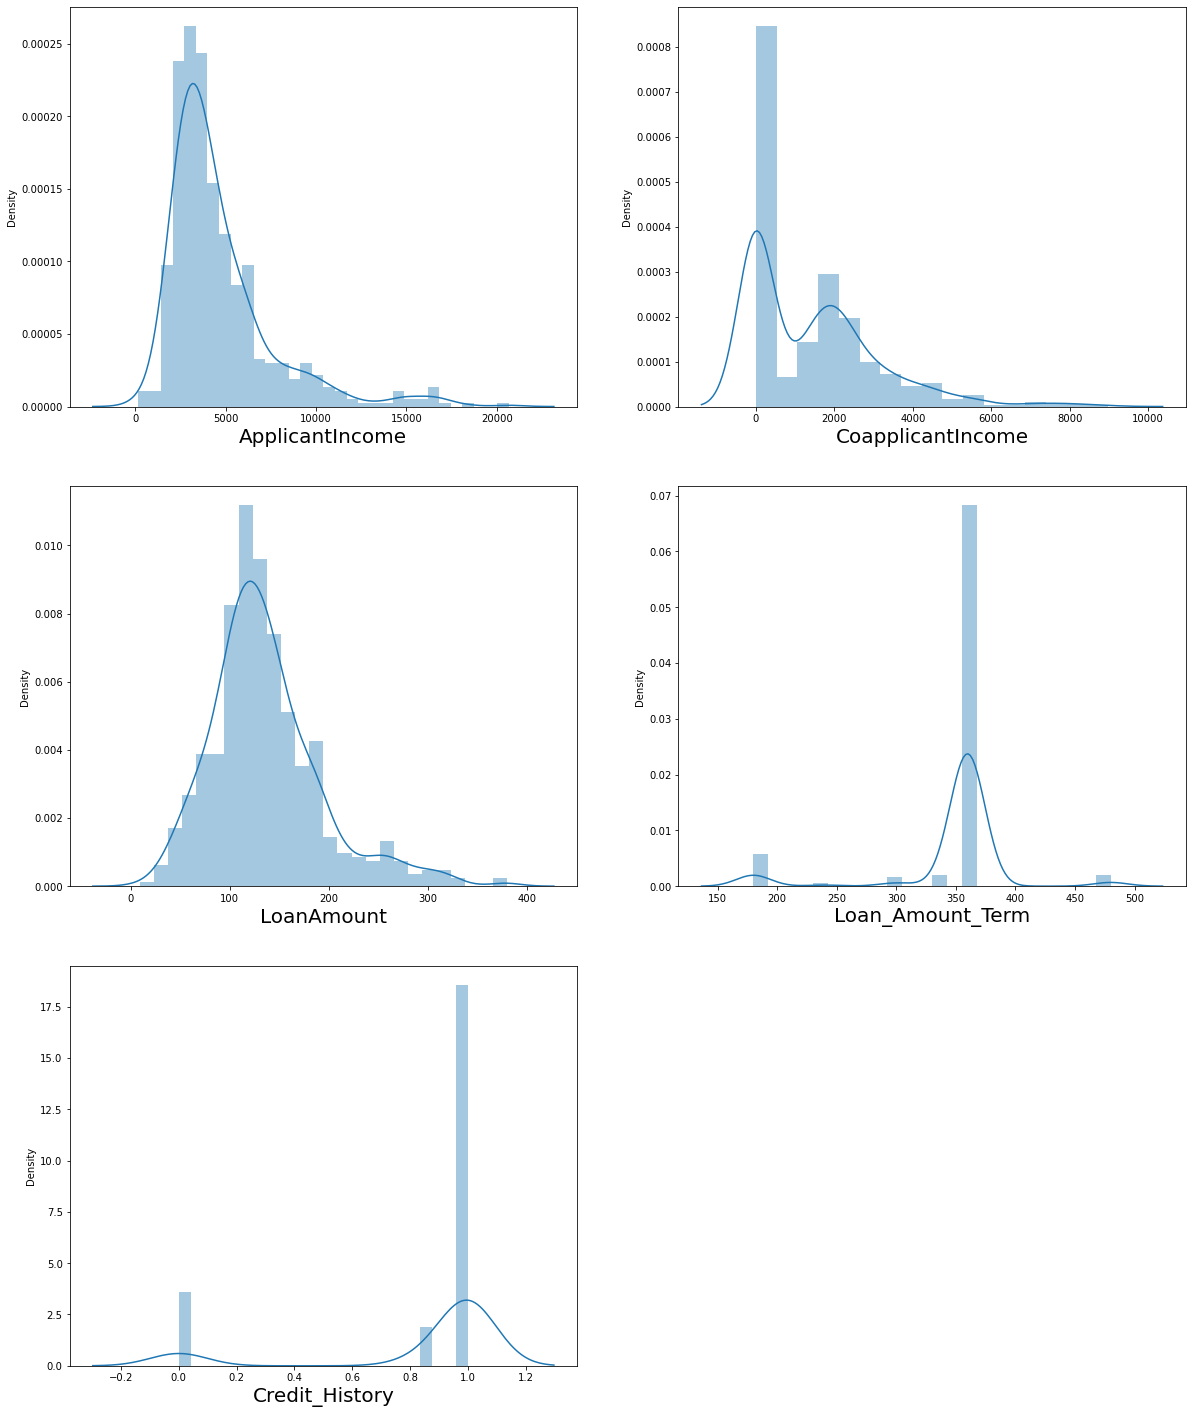

In [62]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in loan_appl[collist]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(loan_appl[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Removing skewness using yeo-johnson method

In [63]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
loan_appl[collist]=power_transform(loan_appl[collist],method='yeo-johnson')
loan_appl[collist]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.681780,-1.122446,0.316078,0.142609,0.515236
1,0.234783,0.744117,-0.015871,0.142609,0.515236
2,-0.527201,-1.122446,-1.443112,0.142609,0.515236
3,-0.791972,0.895786,-0.169860,0.142609,0.515236
4,0.728848,-1.122446,0.221481,0.142609,0.515236
...,...,...,...,...,...
609,-0.587375,-1.122446,-1.301481,0.142609,0.515236
610,0.035386,-1.122446,-2.321865,-2.559206,0.515236
611,1.281658,0.173344,1.838099,0.142609,0.515236
612,1.164426,-1.122446,0.961555,0.142609,0.515236


In [64]:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

The data is not normal but the skewness has got removed compared to the old data.

###### Checking skewness after removal through data visualization using distplot

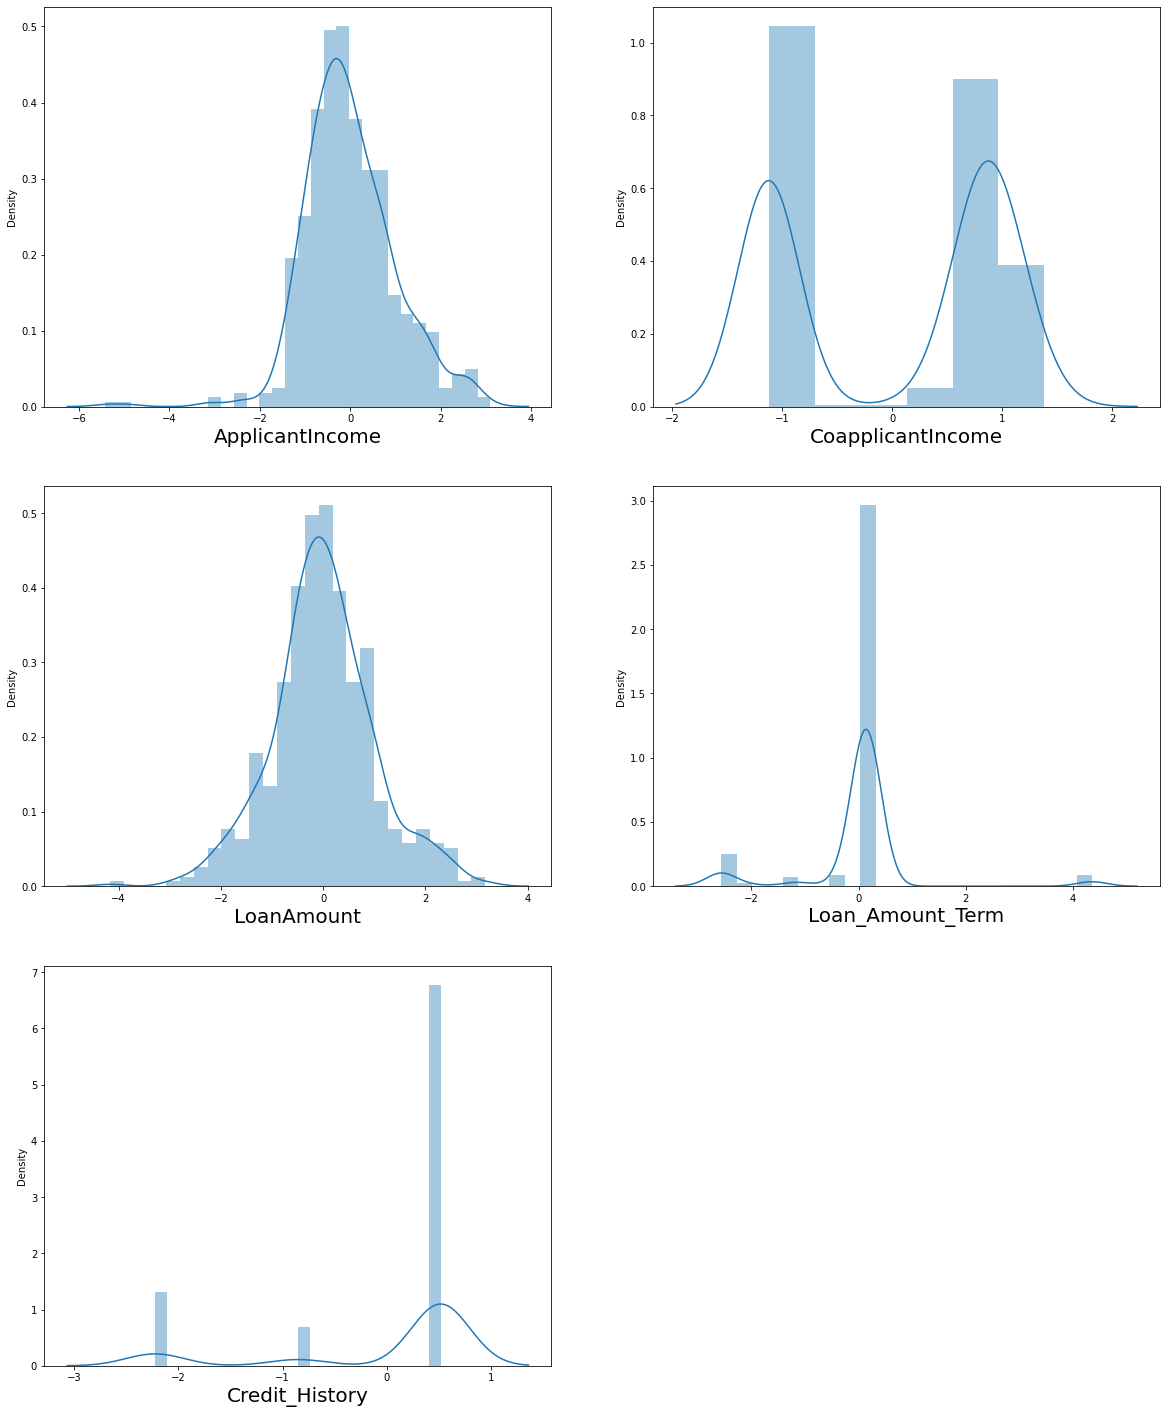

In [65]:
collist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in loan_appl[collist]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(loan_appl[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Data preprocessing

## Spliting data into Target and Features:

In [66]:
x=loan_appl.drop("Loan_Status",axis=1)
y=loan_appl["Loan_Status"]

In [67]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,0.515236,2
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,0.515236,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,0.515236,2
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,0.515236,2
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,0.515236,2


In [68]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [69]:
x.shape,y.shape

((577, 11), (577,))

In [70]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [71]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [72]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [73]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

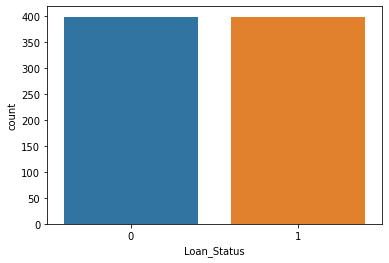

In [74]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [75]:
x.shape, y.shape

((796, 11), (796,))

In [76]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [77]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.497643,-1.235712,-0.684837,-0.503531,-0.327251,0.707957,-1.123433,0.318408,0.149859,0.660771,1.294900
1,0.497643,0.809250,0.363490,-0.503531,-0.327251,0.239345,0.745488,-0.022812,0.149859,0.660771,-1.203865
2,0.497643,0.809250,-0.684837,-0.503531,3.055759,-0.559486,-1.123433,-1.489913,0.149859,0.660771,1.294900
3,0.497643,0.809250,-0.684837,1.985976,-0.327251,-0.837061,0.897349,-0.181102,0.149859,0.660771,1.294900
4,0.497643,-1.235712,-0.684837,-0.503531,-0.327251,0.757301,-1.123433,0.221169,0.149859,0.660771,1.294900


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [78]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [79]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

We can see all the columns are important

In [80]:
x.columns[var_threshold.get_support()]

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [81]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method

In [82]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [83]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

              Feature       Score
9      Credit_History  306.280703
1             Married   18.670805
10      Property_Area    8.351341
2          Dependents    5.329380
4       Self_Employed    5.211338
6   CoapplicantIncome    2.297031
0              Gender    1.546835
8    Loan_Amount_Term    1.188136
7          LoanAmount    0.557496
5     ApplicantIncome    0.057889
3           Education    0.007766


Selecting the best features based on above scores, we can see that the column "LoanAmount" has most lowest features for the prediction, so we will drop this column.

In [84]:
x = x.drop([ "LoanAmount"],axis=1)

In [85]:
x.shape

(796, 10)

In [86]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,0.497643,-1.235712,-0.684837,-0.503531,-0.327251,0.707957,-1.123433,0.149859,0.660771,1.294900
1,0.497643,0.809250,0.363490,-0.503531,-0.327251,0.239345,0.745488,0.149859,0.660771,-1.203865
2,0.497643,0.809250,-0.684837,-0.503531,3.055759,-0.559486,-1.123433,0.149859,0.660771,1.294900
3,0.497643,0.809250,-0.684837,1.985976,-0.327251,-0.837061,0.897349,0.149859,0.660771,1.294900
4,0.497643,-1.235712,-0.684837,-0.503531,-0.327251,0.757301,-1.123433,0.149859,0.660771,1.294900


Now, we have completed features selection process through using 2 techniques.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [87]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.236871,Gender
1,1.452725,Married
2,1.177318,Dependents
3,1.055764,Education
4,1.044877,Self_Employed
5,1.260078,ApplicantIncome
6,1.425028,CoapplicantIncome
7,1.031070,Loan_Amount_Term
8,1.011462,Credit_History
9,1.022970,Property_Area


No Multi-collinearaity is present in columns. So, we will create model now.

## Creating Model

###### Finding the best random state among all the models

In [88]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7907949790794979  on Random_state  10


## Creating train-test-split

In [89]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [90]:
x.shape, y.shape

((796, 10), (796,))

In [91]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((557, 10), (557,), (239, 10), (239,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Logistic Regression

In [92]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7907949790794979
confusion_matrix: 
 [[ 78  33]
 [ 17 111]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       111
           1       0.77      0.87      0.82       128

    accuracy                           0.79       239
   macro avg       0.80      0.78      0.79       239
weighted avg       0.79      0.79      0.79       239



### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

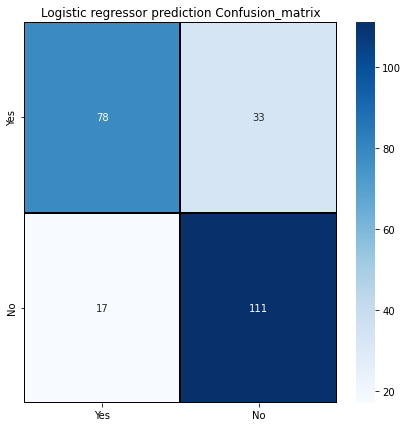

In [93]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

# Classification Algorithms

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier

In [95]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8200836820083682
confusion_matrix: 
 [[ 85  26]
 [ 17 111]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       111
           1       0.81      0.87      0.84       128

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



## Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

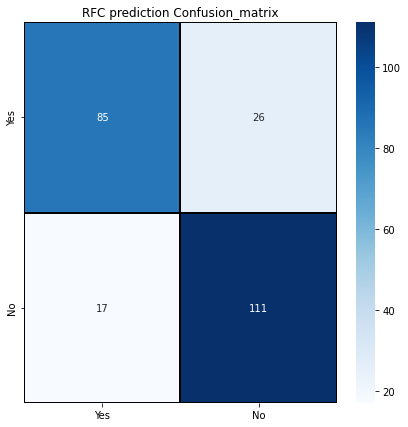

In [96]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

# Decision Tree Classifier

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7322175732217573
confusion_matrix: 
 [[84 27]
 [37 91]]
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       111
           1       0.77      0.71      0.74       128

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.73      0.73       239



## Confusion Matrix for DTC

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

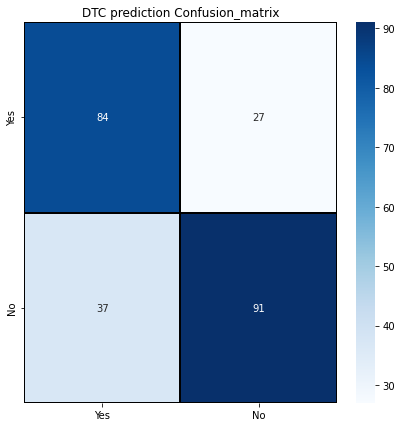

In [98]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

# Support Vector Machine Classifier

In [99]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7656903765690377
confusion_matrix: 
 [[ 63  48]
 [  8 120]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.57      0.69       111
           1       0.71      0.94      0.81       128

    accuracy                           0.77       239
   macro avg       0.80      0.75      0.75       239
weighted avg       0.79      0.77      0.76       239



### Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

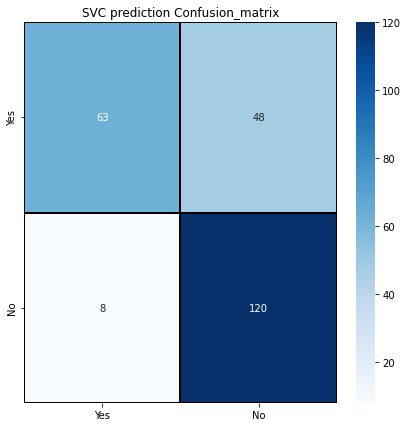

In [100]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("SVC prediction Confusion_matrix")

# KNN Classifier

In [101]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.7322175732217573
confusion_matrix: 
 [[84 27]
 [37 91]]
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       111
           1       0.77      0.71      0.74       128

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.73      0.73       239



### Confusion Matrix for KNN classifier

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

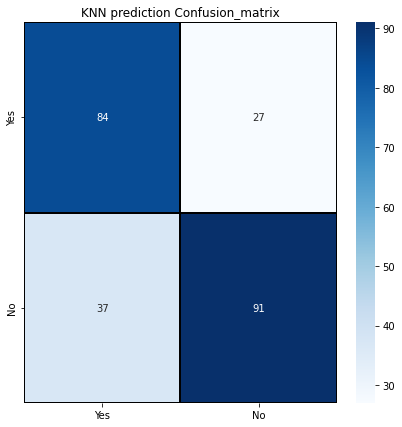

In [102]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

## Gradient Boosting Classifier

In [103]:
gb = GradientBoostingClassifier(n_estimators =300,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.7782426778242678
confusion_matrix: 
 [[ 81  30]
 [ 23 105]]
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       111
           1       0.78      0.82      0.80       128

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



### Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

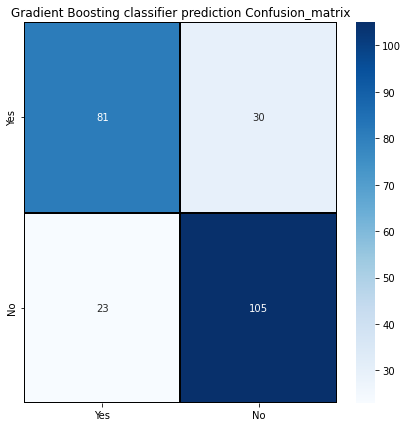

In [104]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

## Cross Validation Score for all the model

CV Score for Logistic Regression

In [105]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7173270440251572


CV Score for Random Forest Classifier

In [106]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.8191430817610064


CV Score for Decision Tree Classifier

In [107]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.7651179245283017


CV Score for Support Vector Classifier

In [108]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.7311635220125786


CV Score for KNN Classifier

In [109]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.7387657232704402


CV Score for Gradient Boosting Classifier

In [110]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.7814465408805031


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

##    Hyper parameter tuning for best model using GridsearchCV

In [111]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}
CV_RFC = GridSearchCV(rfc, param_grid= parameters, scoring= 'accuracy', cv= 5)

In [112]:
CV_RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [114]:
CV_RFC.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 300}

In [115]:
loan_status=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=2, max_features='auto',max_samples=0.1)
loan_status.fit(x_train,y_train)
predict=loan_status.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

accuracy score:  0.7740585774058577
confusion_matrix: 
 [[ 67  44]
 [ 10 118]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.60      0.71       111
           1       0.73      0.92      0.81       128

    accuracy                           0.77       239
   macro avg       0.80      0.76      0.76       239
weighted avg       0.79      0.77      0.77       239



In [116]:
acc=accuracy_score(y_test,pred)
print(acc*100)

53.55648535564853


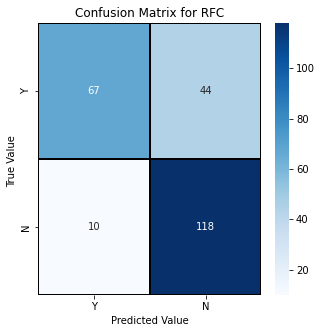

In [117]:
cm = confusion_matrix(y_test, predict)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RFC')
plt.show()

## ROC-AUC Curve


In [118]:
fpr, tpr, threshold = roc_curve(y_test,predict)
auc = roc_auc_score(y_test,predict)

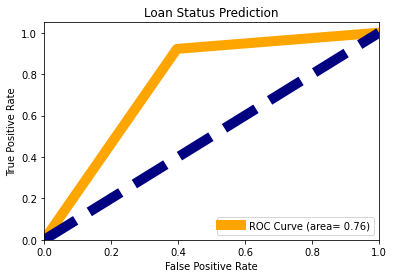

In [119]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Loan Status Prediction")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.77.

## Saving the Model

In [120]:
import pickle
filename='Loan_Status_Prediction.pickle'
pickle.dump(CV_RFC,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [121]:
a =np.array(y_test)
predicted=np.array(CV_RFC.predict(x_test))
Loan_Status_Prediction=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Loan_Status_Prediction

,Orginal,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
234,0,0
235,1,0
236,0,1
237,0,0


In [122]:
model =Loan_Status_Prediction.to_csv('Loan_Status_Prediction.csv')
model